In [1]:
NAME = "GROUP 21 - GROUP PROJECT"
COLLABORATORS = "WILD BUNCH"

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# We will use matplotlib to plot figures
import matplotlib.pyplot as plt

# For regression analysis we will use the statsmodels package
import statsmodels.api as sm
from statsmodels.formula.api import ols

# For visual inspection of the regression models
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot
from statsmodels.discrete.discrete_model import Logit
from scipy.special import logit
import math
from scipy.stats import boxcox
from statsmodels.tools.eval_measures import rmse

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os # accessing directory structure
import re as re

In [3]:
url = "https://raw.githubusercontent.com/jpolakov/DS2_Group21_Project/main/winemag-data-130k-v2.csv"
df = pd.read_csv(url, index_col= 0)
df.head()
df.shape


(129971, 13)

In [4]:
#df.describe

In [5]:
# Find number of duplicate records
df._duplicates = df.duplicated()
print ('Number of duplicate records:{}'.format(df._duplicates.sum()))

Number of duplicate records:9983


<ipython-input-5-53e02941f89f>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df._duplicates = df.duplicated()


In [6]:
# Drop duplicates (9983 records)
df = df.drop_duplicates()
df.shape


(119988, 13)

### Checkpoint
- Folloing columns will not be used in the analysis:

- 'description','designation', 'region_2','taster_twitter_handle' 


In [7]:
# Remove Region_1 and Region_2 from the analysis
#df=df.drop(columns=['description','designation', 'region_2','taster_twitter_handle'], inplace=True)
df.drop(columns=['description','designation','region_2','taster_twitter_handle'], inplace=True)


In [8]:
df

,country,points,price,province,region_1,taster_name,title,variety,winery
0,Italy,87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...
129966,Germany,90,28.0,Mosel,NaN,Anna Lee C. Iijima,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,90,75.0,Oregon,Oregon,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,90,30.0,Alsace,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,90,32.0,Alsace,Alsace,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [9]:
#Find number of missing values per column
df.isnull().sum()

country           59
points             0
price           8395
province          59
region_1       19560
taster_name    24917
title              0
variety            1
winery             0
dtype: int64

### Checkpoint
- number of missing values for "country" column is matching the number of missing values for "province" column
- both are important columns used in analysis 
- we need to drop null value records

In [10]:
# MISSING DATA FIX for empty values in "country", "price" and 'variety' columns
#df.drop(df.loc[df['country'] >= 91 ].index, inplace=True)
df.dropna(subset=['country','price', 'variety'], inplace=True)

In [11]:
df.shape


(111537, 9)

In [12]:
#Find number of missing values per column
df.isnull().sum()

country            0
points             0
price              0
province           0
region_1       17957
taster_name    23272
title              0
variety            0
winery             0
dtype: int64

### Checkpoint
- number of missing values  looks better, no missing values for important columns: country, points, price, province, winery
- we are going to accept that some of the reviews does not have a name of the tester
- we do not care much about reagion for global datest, hoping there will no missing values for smaller focus datasets(US/California/etc)

### CREATING FOCUS DATASETS : 
- Focus Set 1 : US dataset (50k+ = almost 50% rows of total world dataset)
- Focus Set 2 : California (33k+ = 66% percent of US data subset)

In [13]:
# creating new US dataframe called "df_US" 
df_US = df 
df_US.shape

(111537, 9)

In [14]:
#df_US[df_US.country != 'US']
df_US.drop(df_US.loc[df_US['country'] != 'US' ].index, inplace=True)
df_US.shape

(50238, 9)

In [15]:
df_US.province.value_counts()

California           33526
Washington            7913
Oregon                4917
New York              2444
Virginia               718
Idaho                  177
Michigan               103
Texas                   89
America                 84
Colorado                62
New Mexico              44
Arizona                 38
Missouri                33
North Carolina          22
Pennsylvania            17
Ohio                    10
New Jersey               8
Washington-Oregon        7
Massachusetts            6
Illinois                 5
Iowa                     4
Nevada                   3
Connecticut              3
Vermont                  2
Hawaii                   1
Rhode Island             1
Kentucky                 1
Name: province, dtype: int64

In [16]:
# creating new CALIFORNIA dataframe called "df_US" 
df_CAL = df_US
df_CAL = df_CAL.drop(df_CAL.loc[df_CAL['province'] != 'California' ].index)
df_CAL.shape

(33526, 9)

In [17]:
df_CAL.variety.value_counts()

Pinot Noir                   6398
Cabernet Sauvignon           5308
Chardonnay                   4759
Zinfandel                    2452
Syrah                        1742
                             ... 
Cabernet Sauvignon-Malbec       1
Cabernet                        1
Madeira Blend                   1
Pinot Blanc-Viognier            1
Viognier-Valdiguié              1
Name: variety, Length: 193, dtype: int64

In [18]:
#Create df_CAL_SELECTION dataframe as a selection of California dataset with "variety" count higher than 25
df_CAL_SELECTION = df_CAL[df_CAL.groupby('variety').variety.transform('count')>25].copy()
df_CAL_SELECTION.variety.value_counts()

Pinot Noir                  6398
Cabernet Sauvignon          5308
Chardonnay                  4759
Zinfandel                   2452
Syrah                       1742
Sauvignon Blanc             1669
Red Blend                   1656
Merlot                      1295
Bordeaux-style Red Blend     819
Petite Sirah                 632
Sparkling Blend              513
Rosé                         462
Rhône-style Red Blend        451
Viognier                     396
Grenache                     345
White Blend                  335
Cabernet Franc               331
Pinot Grigio                 268
Riesling                     239
Sangiovese                   236
Malbec                       181
Barbera                      175
Pinot Gris                   173
Meritage                     170
Rhône-style White Blend      152
Gewürztraminer               130
Tempranillo                  124
Mourvèdre                    115
G-S-M                        102
Petit Verdot                  99
Albariño  

In [19]:
df_CAL_SELECTION.shape

(32759, 9)

In [20]:
df_CAL_SELECTION.isnull().sum()

country            0
points             0
price              0
province           0
region_1           2
taster_name    15036
title              0
variety            0
winery             0
dtype: int64

In [21]:
df_CAL_SELECTION.dropna(subset=['region_1'], inplace=True)
df_CAL_SELECTION.region_1.isnull().sum()

0

In [22]:
df_CAL_SELECTION.fillna(value="Unknown", inplace=True)
df_CAL_SELECTION.taster_name.isnull().sum()

0

In [23]:
df_CAL_SELECTION.shape

(32757, 9)

In [24]:
df_CAL_SELECTION.reset_index(drop=True, inplace=True)

df_CAL_SELECTION.head(2)

,country,points,price,province,region_1,taster_name,title,variety,winery
0,US,87,19.0,California,Napa Valley,Virginie Boone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
1,US,87,34.0,California,Alexander Valley,Virginie Boone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini


In [25]:
df_CAL_cm=df_CAL_SELECTION.corr(method='pearson') 
df_CAL_cm

,points,price
points,1.000000,0.447159
price,0.447159,1.000000


In [26]:
CAL_model = ols('points ~ price', data=df_CAL_SELECTION).fit()
CAL_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     8186.
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:32:52   Log-Likelihood:                -82103.
No. Observations:               32757   AIC:                         1.642e+05
Df Residuals:                   32755   BIC:                         1.642e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.7410      0.026   3273.657      0.000      86.689      86.793
price          0.0479      0.001     90.478      0.000       0.047       0.049
==============================================================================
Omnibus:                    14243.064   Durbin-Watson:                   0.581
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1121257.507
Skew:                          -1.213   Prob(JB):                         0.00
Kurtosis:                      31.559   Cond. No.                         80.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

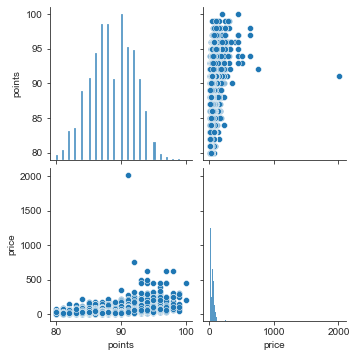

In [27]:
sns.axes_style("whitegrid")
sns.set_style('ticks')
sns.pairplot(df_CAL_SELECTION);

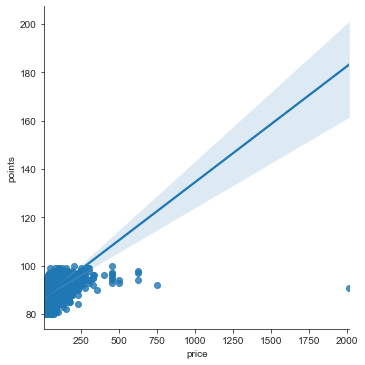

In [28]:
sns.lmplot(x='price', y= 'points',data=df_CAL_SELECTION);

In [29]:
df_CAL_SELECTION['log_price']=np.log(df_CAL_SELECTION['price'])

In [30]:
df_CAL_cm=df_CAL_SELECTION.corr(method='pearson') 
df_CAL_cm

,points,price,log_price
points,1.000000,0.447159,0.569261
price,0.447159,1.000000,0.826701
log_price,0.569261,0.826701,1.000000


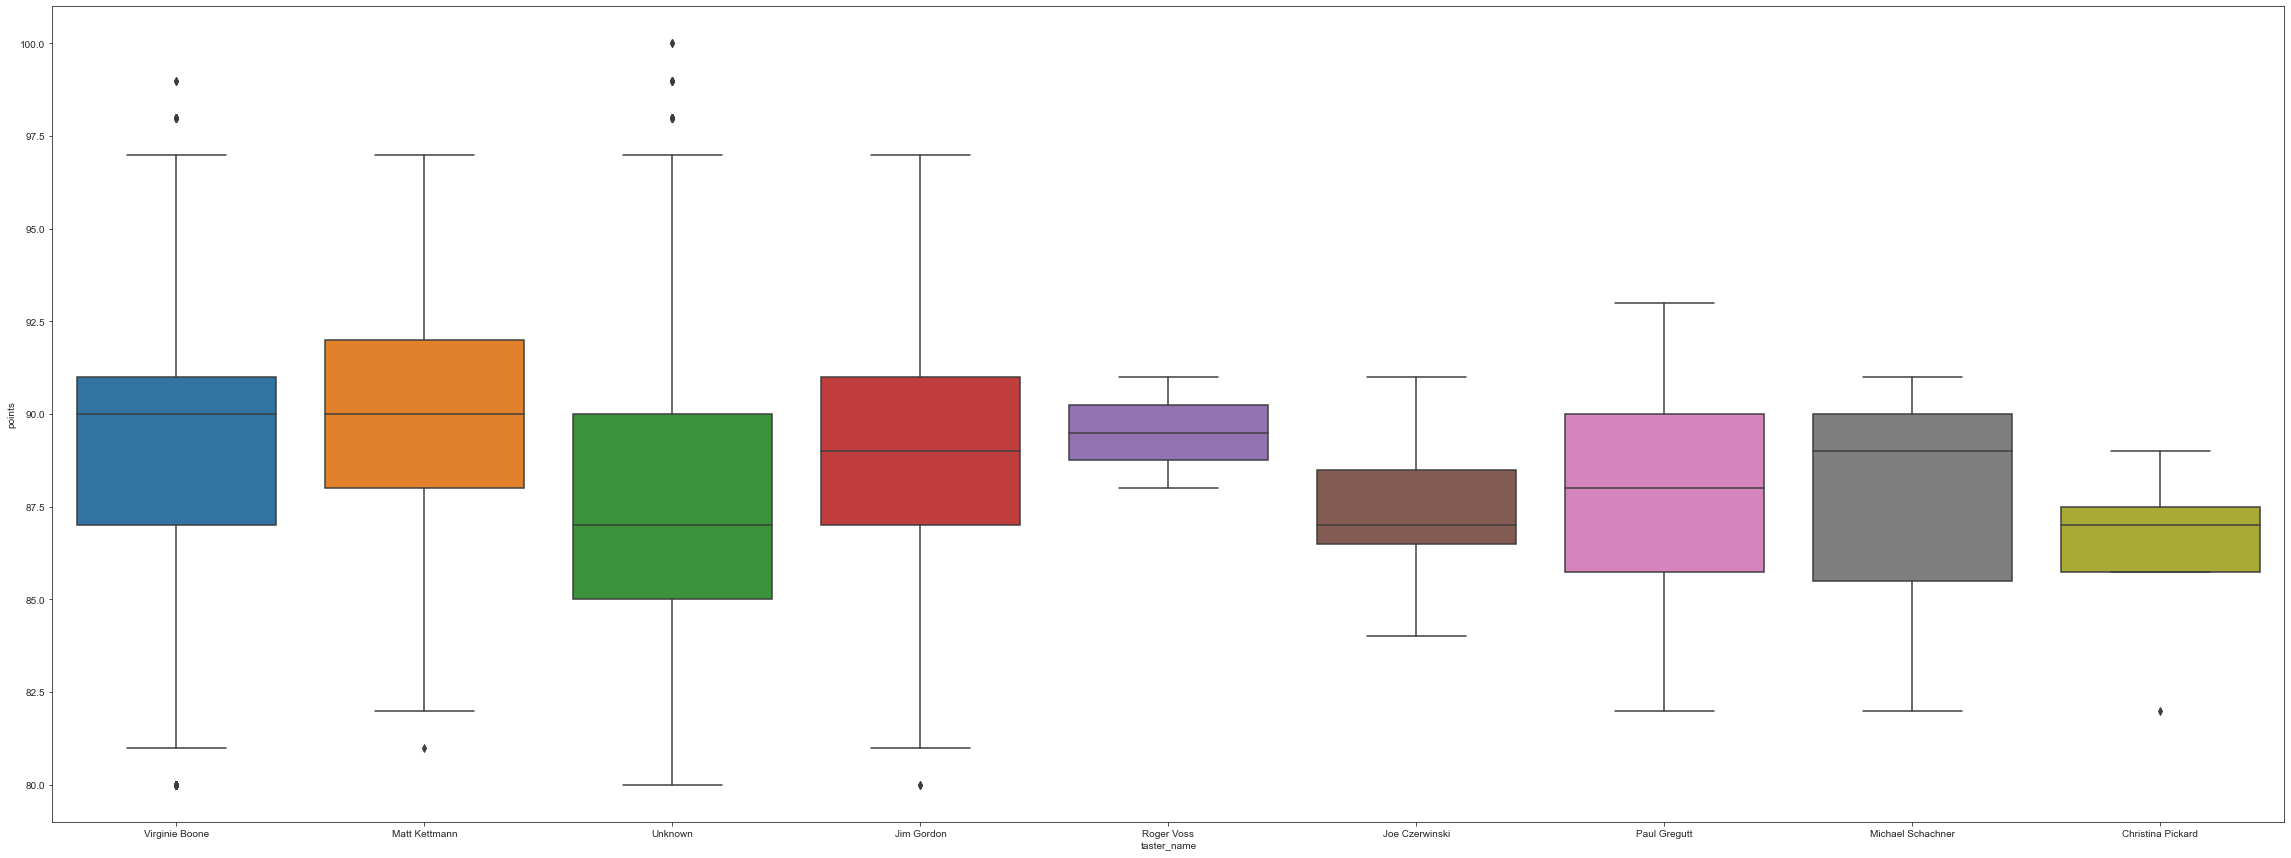

In [31]:
plt.figure(figsize=(40, 15))
sns.boxplot(x='taster_name', y='points', data=df_CAL_SELECTION);

In [32]:
df_CAL_SELECTION['region_1'].value_counts()

Napa Valley                               4095
Russian River Valley                      2816
California                                2409
Paso Robles                               2059
Sonoma Coast                              1363
                                          ... 
Mendocino-Amador                             1
Monterey-San Luis Obispo-Santa Barbara       1
Napa County-Lake County                      1
Sonoma-Napa-Mendocino                        1
Napa Valley-Paso Robles                      1
Name: region_1, Length: 180, dtype: int64

### Simplifying the regions into North Coast, Central Coast, Sierra Foothils, Inland Valley, and Southern California

In [33]:
df_CAL_clean_regions = pd.DataFrame(df_CAL_SELECTION)
df_CAL_clean_regions

,country,points,price,province,region_1,taster_name,title,variety,winery,log_price
0,US,87,19.0,California,Napa Valley,Virginie Boone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,2.944439
1,US,87,34.0,California,Alexander Valley,Virginie Boone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,3.526361
2,US,87,12.0,California,Central Coast,Matt Kettmann,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou,2.484907
3,US,87,22.0,California,Paso Robles,Matt Kettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,3.091042
4,US,87,69.0,California,Sonoma Coast,Virginie Boone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,4.234107
...,...,...,...,...,...,...,...,...,...,...
32752,US,90,35.0,California,Sonoma County,Virginie Boone,Arrowood 2010 Cabernet Sauvignon (Sonoma County),Cabernet Sauvignon,Arrowood,3.555348
32753,US,90,20.0,California,Santa Ynez Valley,Matt Kettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino,2.995732
32754,US,90,35.0,California,Napa Valley,Virginie Boone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs,3.555348
32755,US,90,35.0,California,Napa Valley,Virginie Boone,Hendry 2012 Blocks 7 & 22 Zinfandel (Napa Valley),Zinfandel,Hendry,3.555348


In [34]:
ab_regions = df_CAL_clean_regions.region_1.unique()
ab_regions.sort()
ab_regions

array(['Adelaida District', 'Alexander Valley', 'Alta Mesa',
       'Amador County', 'Amador-Napa', 'Anderson Valley',
       'Antelope Valley of the California High Desert',
       'Arroyo Grande Valley', 'Arroyo Seco', 'Atlas Peak',
       'Ballard Canyon', 'Ben Lomond Mountain', 'Bennett Valley',
       'Big Valley District-Lake County', 'Calaveras County',
       'California', 'California Other', 'California-Oregon', 'Calistoga',
       'Capay Valley', 'Carmel Valley', 'Carneros',
       'Carneros-Napa Valley', 'Central Coast', 'Central Valley',
       'Chalk Hill', 'Chalone', 'Chiles Valley', 'Cienega Valley',
       'Clarksburg', 'Clear Lake', 'Clements Hills', 'Cole Ranch',
       'Contra Costa County', 'Coombsville', 'Cucamonga Valley',
       'Diamond Mountain District', 'Dry Creek Valley', 'Dunnigan Hills',
       'Edna Valley', 'El Dorado', 'El Dorado County',
       'El Pomar District', 'Fair Play', 'Fiddletown',
       'Fort Ross-Seaview', 'Green Valley', 'Guenoc Valley',


In [35]:
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Napa'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Lake County'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Los Carneros'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Mendocino'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Solano County'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Sonoma'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Alexander'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Clear Lake'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Anderson'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Redwood'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Carneros'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Bennett'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Dry Creek'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Chalk'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Green Valley'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Knight'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Rockpile'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Ross'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Oak Knoll'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Atlas'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Calistoga'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Rutherford'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Helena'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Howell'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Veeder'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Chiles'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Diamond'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Stags'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Spring'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Yountville'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Cole'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Potter'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Coombs'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'High'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Guenoc'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Pine Mountain'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Humboldt'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Tehama'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'McDowell'), 'region_1']='North Coast'

In [36]:
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Livermore'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Monterey'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Paso Robles'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'San Benito'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'San Francisco'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'San Luis Obispo'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Santa Barbara'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Santa Clara'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Santa Cruz'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Ynez'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Carmel'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Edna'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Lucas'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'York'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Arroyo'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Ben Lomond'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Rita'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Santa'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Antonio'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Adelaida'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Ballard'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Cienega'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Harlan'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Templeton'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Paicines'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Bernabe'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'El Pomar'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Sierra Pelona'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Lime Kiln'), 'region_1']='Central Coast'


In [37]:
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Amador'), 'region_1']='Sierra Foothills'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Calaveras'), 'region_1']='Sierra Foothills'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'El Dorado'), 'region_1']='Sierra Foothills'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Nevada'), 'region_1']='Sierra Foothills'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Placer'), 'region_1']='Sierra Foothills'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Yuba'), 'region_1']='Sierra Foothills'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Fair Play'), 'region_1']='Sierra Foothills'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Shenandoah'), 'region_1']='Sierra Foothills'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Fiddle'), 'region_1']='Sierra Foothills'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Tuolumne'), 'region_1']='Sierra Foothills'

In [38]:
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Lodi'), 'region_1']='Inland Valleys'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Madera'), 'region_1']='Inland Valleys'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Sacramento'), 'region_1']='Inland Valleys'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'San Joaquin'), 'region_1']='Inland Valleys'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Capay'), 'region_1']='Inland Valleys'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Russian River'), 'region_1']='Inland Valleys'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Yolo'), 'region_1']='Inland Valleys'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'River Junction'), 'region_1']='Inland Valleys'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Contra'), 'region_1']='Inland Valleys'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Dunnigan'), 'region_1']='Inland Valleys'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Central Valley'), 'region_1']='Inland Valleys'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Alta Mesa'), 'region_1']='Inland Valleys'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Clarksburg'), 'region_1']='Inland Valleys'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Clements'), 'region_1']='Inland Valleys'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Mokelumne'), 'region_1']='Inland Valleys'

In [39]:
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Cucamonga'), 'region_1']='Southern CA'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Los Angeles'), 'region_1']='Southern CA'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'San Diego'), 'region_1']='Southern CA'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Temecula'), 'region_1']='Southern CA'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Malibu'), 'region_1']='Southern CA'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Oakville'), 'region_1']='Southern CA'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Antelope'), 'region_1']='Southern CA'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Chalone'), 'region_1']='Southern CA'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Marin'), 'region_1']='Southern CA'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'South Coast'), 'region_1']='Southern CA'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Suisun'), 'region_1']='Southern CA'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Ventura'), 'region_1']='Southern CA'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Ramona'), 'region_1']='Southern CA'


In [40]:
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'California'), 'region_1']='Other'

In [41]:
areas=pd.DataFrame(df_CAL_clean_regions['region_1'].value_counts())
areas.sort_values('region_1', ascending = False)

,region_1
North Coast,15554
Central Coast,9068
Inland Valleys,3784
Other,2415
Sierra Foothills,1285
Southern CA,651


### Any of the wines in the "Other" region are being assigned to the same region as another one from the same winery if possible in this code:

In [42]:
#winery_other = pd.DataFrame(df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Other'), 'winery'])
df_other=df_CAL_clean_regions
df_other.head(2)


,country,points,price,province,region_1,taster_name,title,variety,winery,log_price
0,US,87,19.0,California,North Coast,Virginie Boone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,2.944439
1,US,87,34.0,California,North Coast,Virginie Boone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,3.526361


In [43]:
df_other = df_other.drop(df_other.loc[df_other['region_1']!='Other'].index)
df_other.head(2)

,country,points,price,province,region_1,taster_name,title,variety,winery,log_price
14,US,86,12.0,California,Other,Jim Gordon,Cocobon 2014 Red (California),Red Blend,Cocobon,2.484907
103,US,85,16.0,California,Other,Unknown,Cline 2007 Ancient Vines Zinfandel (California),Zinfandel,Cline,2.772589


In [44]:
df_not_other=df_CAL_clean_regions
df_not_other = df_not_other.drop(df_not_other.loc[df_not_other['region_1']=='Other'].index)
df_not_other.head(2)

,country,points,price,province,region_1,taster_name,title,variety,winery,log_price
0,US,87,19.0,California,North Coast,Virginie Boone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,2.944439
1,US,87,34.0,California,North Coast,Virginie Boone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,3.526361


In [45]:
top_region = pd.DataFrame(df_not_other.groupby(['winery']).region_1.value_counts())
top_region.drop(columns=['region_1'], inplace=True)
top_region.reset_index(inplace=True)
top_region

,winery,region_1
0,10 Knots,Central Coast
1,1000 Stories,North Coast
2,1070 Green,North Coast
3,10Span,Central Coast
4,12C Wines,North Coast
...,...,...
4463,kukkula,Central Coast
4464,m2 Wines,North Coast
4465,un4seen,Inland Valleys
4466,Écluse,Central Coast


In [46]:
wine_dict = top_region.set_index('winery').to_dict()['region_1']
wine_dict



{'10 Knots': 'Central Coast',
 '1000 Stories': 'North Coast',
 '1070 Green': 'North Coast',
 '10Span': 'Central Coast',
 '12C Wines': 'North Coast',
 '16X20': 'North Coast',
 '181': 'Inland Valleys',
 '1850': 'Central Coast',
 '29 & Oak Wines': 'Southern CA',
 '2Plank': 'Southern CA',
 '2nd Chance': 'Central Coast',
 '3 Badge Beverage': 'Inland Valleys',
 '3 Spells': 'North Coast',
 '3 Steves Winery': 'Central Coast',
 '32 Winds': 'North Coast',
 '337 Wine Cellars': 'Inland Valleys',
 '3CV': 'Central Coast',
 '401K': 'North Coast',
 '50 Harvests': 'North Coast',
 '6 North': 'North Coast',
 '7 Heavenly Chards': 'Inland Valleys',
 '75 Wine Co.': 'North Coast',
 'A By Acacia': 'North Coast',
 'A Cellar Full of Noise': 'Central Coast',
 'A Donkey and Goat': 'Sierra Foothills',
 'A.P. Vin': 'Inland Valleys',
 'A.S. Kiken': 'North Coast',
 'AJB Vineyards': 'Central Coast',
 'AZS': 'North Coast',
 'Aaron': 'Central Coast',
 'Abbeyville': 'North Coast',
 "Abbot's Passage": 'North Coast',
 'Abi

In [47]:
df_other['region_1']=df_other['winery'].map(wine_dict)

In [48]:
df_other

,country,points,price,province,region_1,taster_name,title,variety,winery,log_price
14,US,86,12.0,California,NaN,Jim Gordon,Cocobon 2014 Red (California),Red Blend,Cocobon,2.484907
103,US,85,16.0,California,Inland Valleys,Unknown,Cline 2007 Ancient Vines Zinfandel (California),Zinfandel,Cline,2.772589
104,US,85,15.0,California,NaN,Unknown,Vinavanti 2005 Le Bon Viveur Red (California),Red Blend,Vinavanti,2.708050
106,US,85,12.0,California,NaN,Unknown,Morro Bay 2006 Split Oak Vineyard Cabernet Sau...,Cabernet Sauvignon,Morro Bay,2.484907
107,US,89,30.0,California,Central Coast,Jim Gordon,Las Positas 2014 Verdigris White (California),White Blend,Las Positas,3.401197
...,...,...,...,...,...,...,...,...,...,...
32686,US,84,18.0,California,Central Coast,Unknown,Martin Ray 2008 Dessert Wine Red (California),Red Blend,Martin Ray,2.890372
32706,US,87,23.0,California,Inland Valleys,Unknown,Passaggio 2011 New Generation Unoaked Chardonn...,Chardonnay,Passaggio,3.135494
32707,US,87,22.0,California,North Coast,Unknown,Chandon NV Brut Classic Sparkling (California),Sparkling Blend,Chandon,3.091042
32708,US,87,22.0,California,North Coast,Unknown,Chandon NV Rosé Sparkling (California),Sparkling Blend,Chandon,3.091042


In [49]:
Final_CAL_df=pd.concat([df_other, df_not_other], axis=0)  
Final_CAL_df



,country,points,price,province,region_1,taster_name,title,variety,winery,log_price
14,US,86,12.0,California,NaN,Jim Gordon,Cocobon 2014 Red (California),Red Blend,Cocobon,2.484907
103,US,85,16.0,California,Inland Valleys,Unknown,Cline 2007 Ancient Vines Zinfandel (California),Zinfandel,Cline,2.772589
104,US,85,15.0,California,NaN,Unknown,Vinavanti 2005 Le Bon Viveur Red (California),Red Blend,Vinavanti,2.708050
106,US,85,12.0,California,NaN,Unknown,Morro Bay 2006 Split Oak Vineyard Cabernet Sau...,Cabernet Sauvignon,Morro Bay,2.484907
107,US,89,30.0,California,Central Coast,Jim Gordon,Las Positas 2014 Verdigris White (California),White Blend,Las Positas,3.401197
...,...,...,...,...,...,...,...,...,...,...
32752,US,90,35.0,California,North Coast,Virginie Boone,Arrowood 2010 Cabernet Sauvignon (Sonoma County),Cabernet Sauvignon,Arrowood,3.555348
32753,US,90,20.0,California,Central Coast,Matt Kettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino,2.995732
32754,US,90,35.0,California,North Coast,Virginie Boone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs,3.555348
32755,US,90,35.0,California,North Coast,Virginie Boone,Hendry 2012 Blocks 7 & 22 Zinfandel (Napa Valley),Zinfandel,Hendry,3.555348


In [50]:
Final_CAL_df = Final_CAL_df.fillna(value='Other')
Final_CAL_df

,country,points,price,province,region_1,taster_name,title,variety,winery,log_price
14,US,86,12.0,California,Other,Jim Gordon,Cocobon 2014 Red (California),Red Blend,Cocobon,2.484907
103,US,85,16.0,California,Inland Valleys,Unknown,Cline 2007 Ancient Vines Zinfandel (California),Zinfandel,Cline,2.772589
104,US,85,15.0,California,Other,Unknown,Vinavanti 2005 Le Bon Viveur Red (California),Red Blend,Vinavanti,2.708050
106,US,85,12.0,California,Other,Unknown,Morro Bay 2006 Split Oak Vineyard Cabernet Sau...,Cabernet Sauvignon,Morro Bay,2.484907
107,US,89,30.0,California,Central Coast,Jim Gordon,Las Positas 2014 Verdigris White (California),White Blend,Las Positas,3.401197
...,...,...,...,...,...,...,...,...,...,...
32752,US,90,35.0,California,North Coast,Virginie Boone,Arrowood 2010 Cabernet Sauvignon (Sonoma County),Cabernet Sauvignon,Arrowood,3.555348
32753,US,90,20.0,California,Central Coast,Matt Kettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino,2.995732
32754,US,90,35.0,California,North Coast,Virginie Boone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs,3.555348
32755,US,90,35.0,California,North Coast,Virginie Boone,Hendry 2012 Blocks 7 & 22 Zinfandel (Napa Valley),Zinfandel,Hendry,3.555348


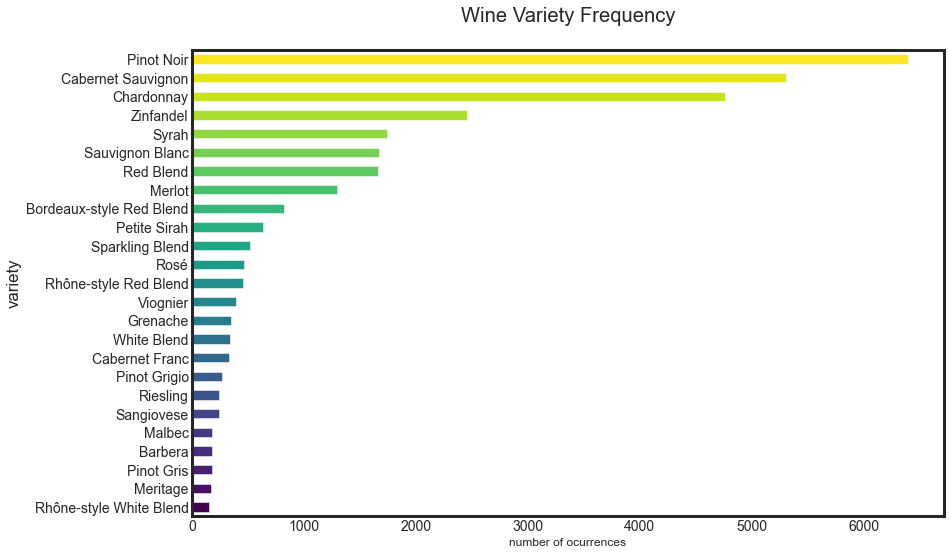

In [94]:
num_bars = 25
fig = plt.figure(figsize=(12,8))
colors = plt.cm.get_cmap('viridis', num_bars)
Final_CAL_df.groupby('variety').variety.count().sort_values()[num_bars:].plot.barh(
    ylim=0, color=colors.colors, title= 'Wine Variety Frequency\n')
plt.xlabel('number of ocurrences', fontsize = 12);

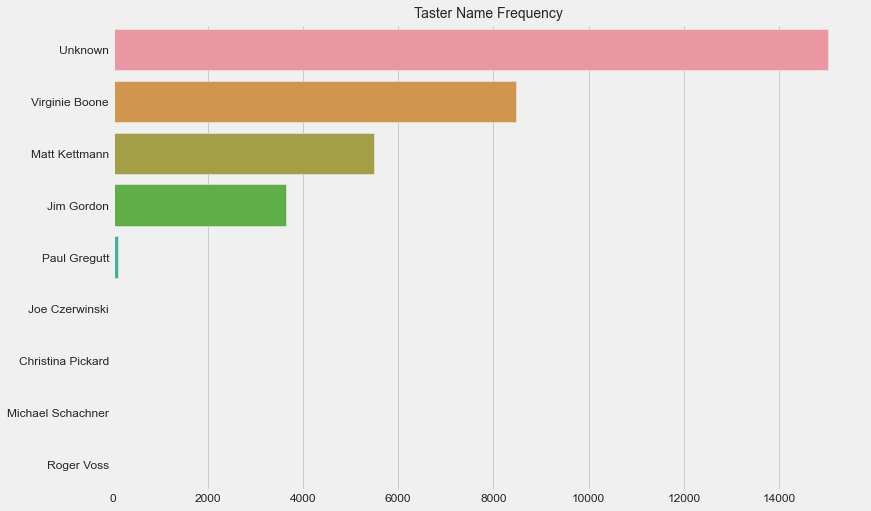

In [52]:
import matplotlib.style as style
# Get label frequencies in descending order
label_freq = Final_CAL_df['taster_name'].apply(lambda s: str(s)).explode().value_counts().sort_values(ascending=False)

# Bar plot
style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
sns.barplot(y=label_freq.index.values, x=label_freq, order=label_freq.iloc[:15].index)
plt.title("Taster Name Frequency", fontsize=14)
plt.xlabel("")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [53]:
Final_CAL_df.region_1.value_counts()

North Coast         15882
Central Coast        9426
Inland Valleys       4214
Sierra Foothills     1413
Other                1116
Southern CA           706
Name: region_1, dtype: int64

### There still remains 1116 wines in the "Other" region

In [54]:
Final_CAL_df.taster_name.value_counts()

Unknown              15036
Virginie Boone        8463
Matt Kettmann         5481
Jim Gordon            3641
Paul Gregutt           112
Joe Czerwinski          15
Christina Pickard        4
Michael Schachner        3
Roger Voss               2
Name: taster_name, dtype: int64

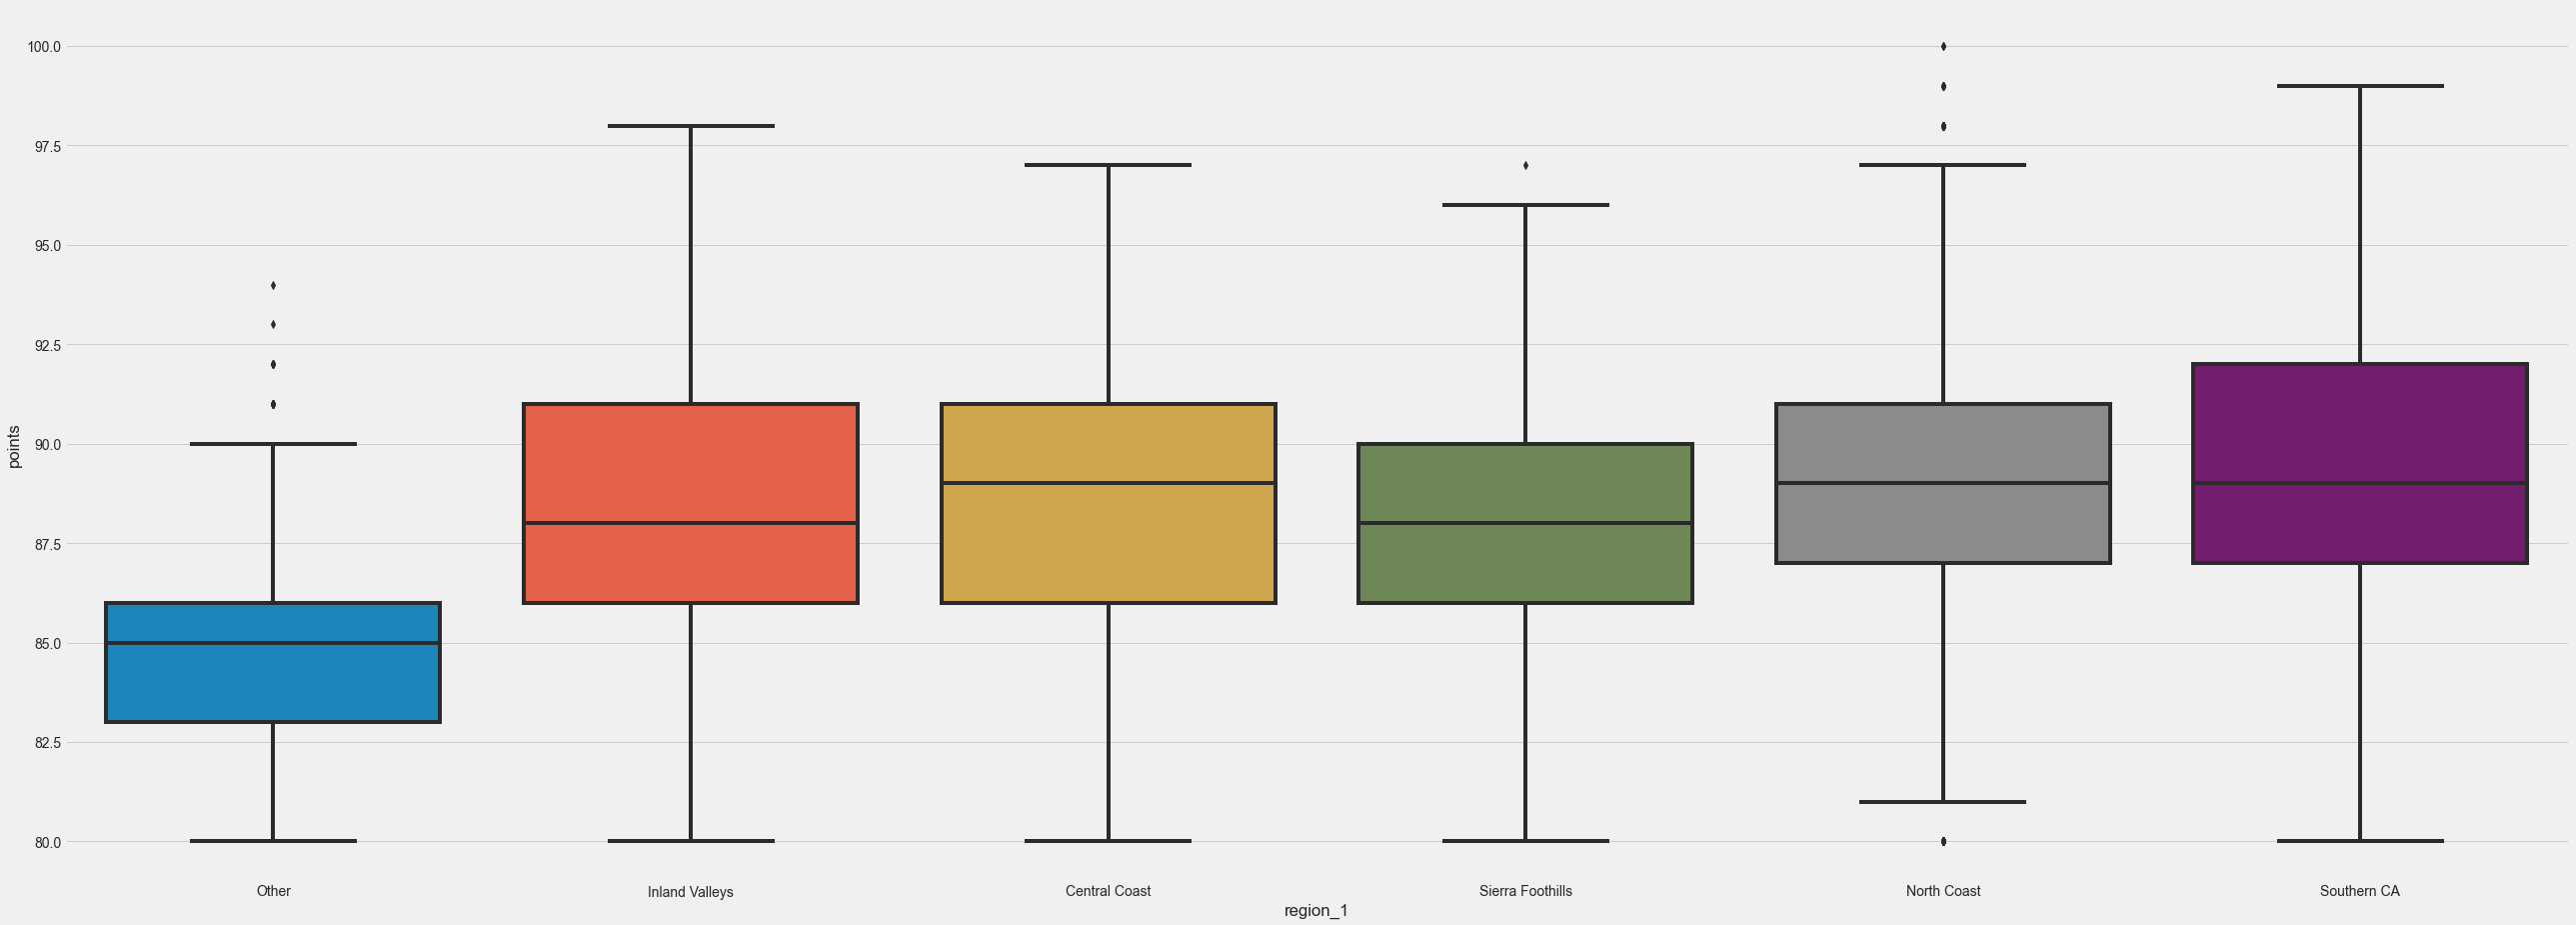

In [55]:
plt.figure(figsize=(40, 15))
sns.boxplot(x='region_1', y='points', data=Final_CAL_df);

In [56]:
Final_CAL_df['variety'] = Final_CAL_df['variety'].astype('category')
Final_CAL_df['taster_name'] = Final_CAL_df['taster_name'].astype('category')
Final_CAL_df['region_1'] = Final_CAL_df['region_1'].astype('category')

In [57]:
CAL_model = ols('points ~ log_price + taster_name + variety + region_1', data= Final_CAL_df).fit()
print(CAL_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     359.6
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:33:04   Log-Likelihood:                -77135.
No. Observations:               32757   AIC:                         1.544e+05
Df Residuals:                   32693   BIC:                         1.549e+05
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [58]:
sm.stats.anova_lm(CAL_model)

,df,sum_sq,mean_sq,F,PR(>F)
taster_name,8.0,26513.685586,3314.210698,508.953435,0.0
variety,49.0,26094.848191,532.547922,81.781793,0.0
region_1,5.0,15138.965066,3027.793013,464.969127,0.0
log_price,1.0,79757.173206,79757.173206,12248.070807,0.0
Residual,32693.0,212890.773138,6.511815,NaN,NaN


## The anova test rejects the null hypothesis that the means for each group are the same. This means that within the categories, the average points are different

# Given this regression output, these variables  appear to be potentially statistically significant: 

taster_name[T.Jim Gordon]

taster_name[T.Matt Kettmann]

taster_name[T.Paul Gregutt

variety[T.Barbera]

variety[T.Bordeaux-style Red Blend]

variety[T.Cabernet Franc]

variety[T.Cabernet Sauvignon]

variety[T.Cabernet Sauvignon-Syrah]

variety[T.Chardonnay]

variety[T.G-S-M]

variety[T.Grenache]

variety[T.Malbec]

variety[T.Marsanne]

variety[T.Meritage]

variety[T.Merlot]

variety[T.Mourvèdre]

variety[T.Petit Verdot]

variety[T.Petite Sirah]

variety[T.Pinot Grigio]

variety[T.Pinot Noir]

variety[T.Port]

variety[T.Primitivo

variety[T.Red Blend]

variety[T.Rhône-style Red Blend]

variety[T.Rhône-style White Blend]

variety[T.Rosé]

variety[T.Roussanne]

variety[T.Sangiovese]

variety[T.Sauvignon Blanc]

variety[T.Shiraz]

variety[T.Syrah]

variety[T.Tannat]

variety[T.Tempranillo]

variety[T.Viognier]

variety[T.White Blend

variety[T.Zinfandel]

region_1[T.Inland Valleys]

region_1[T.North Coast]

region_1[T.Sierra Foothills]

region_1[T.Southern CA]

log_price


## They have a p-value of less than 0.05 and their confidence intervals do not contain 0

## Testing the basic model with log price

In [59]:
CAL_model = ols('points ~log_price', data= Final_CAL_df).fit()
CAL_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                 1.570e+04
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:33:04   Log-Likelihood:                -79343.
No. Observations:               32757   AIC:                         1.587e+05
Df Residuals:                   32755   BIC:                         1.587e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     77.6645      0.089    875.101      0.000      77.491      77.838
log_price      3.1473      0.025    125.313      0.000       3.098       3.197
==============================================================================
Omnibus:                      688.185   Durbin-Watson:                   0.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              712.163
Skew:                          -0.348   Prob(JB):                    2.27e-155
Kurtosis:                       2.803   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### With a Prob (F-statistic) of almost zero, we now know that log_price is a statistically significant predictor of points. R-squared is 0.324, which tells us that 32.4% of the variance is explained by the model. 

In [60]:
df_CAL_cm=Final_CAL_df.corr(method='pearson') 
df_CAL_cm

,points,price,log_price
points,1.000000,0.447159,0.569261
price,0.447159,1.000000,0.826701
log_price,0.569261,0.826701,1.000000


### There is a positive correlation with log_price and points

<Figure size 1080x1080 with 0 Axes>

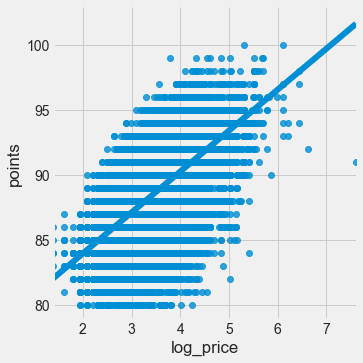

In [61]:
plt.figure(figsize=(15,15))
sns.lmplot(x='log_price', y= 'points',data=Final_CAL_df);

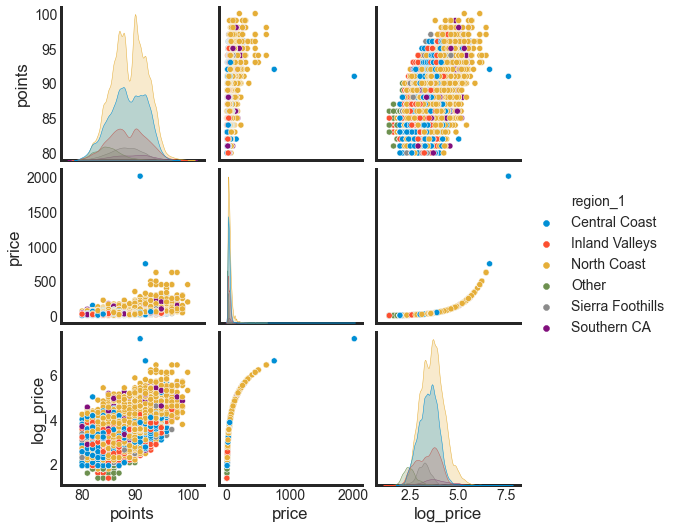

In [62]:
sns.axes_style("whitegrid")
sns.set_style('ticks')
sns.pairplot(Final_CAL_df, hue= 'region_1');

<AxesSubplot:>

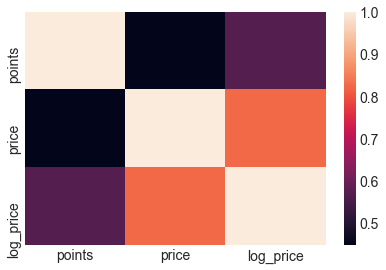

In [63]:
sns.heatmap(Final_CAL_df.corr())

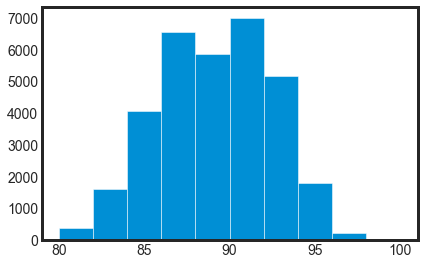

In [64]:
plt.hist(Final_CAL_df.points)
plt.show()

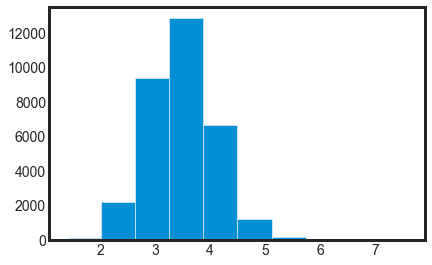

In [65]:
plt.hist(Final_CAL_df.log_price)
plt.show()

In [66]:
Final_CAL_df.describe()

,points,price,log_price
count,32757.000000,32757.000000,32757.000000
mean,88.624508,39.291358,3.482364
std,3.316990,30.941662,0.599958
min,80.000000,4.000000,1.386294
25%,86.000000,22.000000,3.091042
50%,89.000000,33.000000,3.496508
75%,91.000000,48.000000,3.871201
max,100.000000,2013.000000,7.607381


In [67]:
b0, b1=CAL_model.params
Final_CAL_df['y_hat_1']=b0 + b1*Final_CAL_df.log_price
Final_CAL_df['residuals_1']=Final_CAL_df.points - Final_CAL_df.y_hat_1

Final_CAL_df['residuals_1'].mean()

-1.340220211608925e-13

In [68]:
#RMSE (Root of the mean squared error )
Final_SE=(Final_CAL_df['residuals_1'] - Final_CAL_df['residuals_1'].mean())**2
Final_MSE=Final_SE.mean()
Final_RMSE=Final_MSE**0.5

In [69]:
Final_CAL_df['residuals_1'].describe()

count    3.275700e+04
mean    -1.340220e-13
std      2.727086e+00
min     -1.143440e+01
25%     -1.854208e+00
50%      2.047634e-01
75%      2.057131e+00
max      9.425564e+00
Name: residuals_1, dtype: float64

### The mean of the residuals is approximately zero, which supports that they are normally distributed

In [70]:
max_res = Final_CAL_df['residuals_1'].mean() + 3*Final_RMSE
min_res = Final_CAL_df['residuals_1'].mean() - 3*Final_RMSE
#Potential outliers' residuals  are 3 standard deviations away from the residuals mean

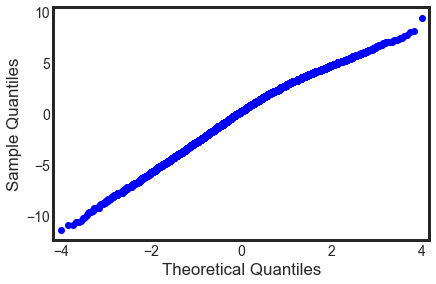

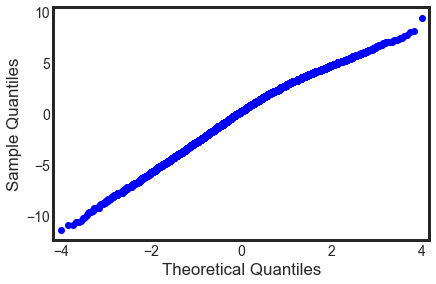

In [71]:
sm.qqplot(CAL_model.resid)

# THe qqplot suggests normal distribution

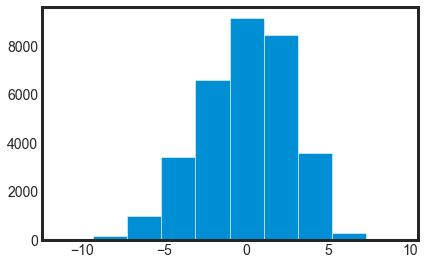

In [72]:
plt.hist(Final_CAL_df.residuals_1)
plt.show()

# THe histogram supports the normal distribution

In [73]:
out_max = Final_CAL_df.loc[Final_CAL_df['residuals_1']>max_res].index
out_max

Int64Index([29903], dtype='int64')

In [74]:
out_min = Final_CAL_df.loc[Final_CAL_df['residuals_1']<min_res].index
out_min

Int64Index([ 7651,  7652, 23992, 29665, 30983,   666,  1898,  1956,  3048,
             4962,  5270,  5830,  6373,  7941,  8620,  8935,  9397, 10771,
            11217, 11736, 11935, 12723, 12928, 13269, 13444, 13459, 14527,
            14532, 14731, 15777, 16843, 16934, 16936, 19507, 20281, 20905,
            21398, 22917, 23008, 23178, 23283, 25464, 25626, 25879, 26112,
            26142, 26143, 26146, 26470, 26471, 27414, 27606, 27727, 27732,
            27733, 27860, 28447, 28826, 28979, 28980, 29094, 29359, 29606,
            29610, 29664, 29666, 30455, 30839, 31080, 31211, 32111, 32318],
           dtype='int64')

## The two equations above are potential outliers

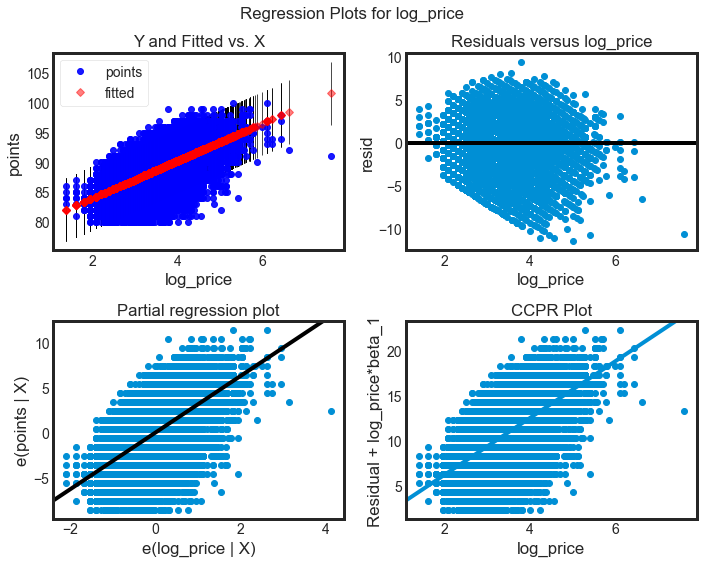

In [75]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(CAL_model, "log_price", fig = fig)

In [76]:
Final_CAL_df.columns

Index(['country', 'points', 'price', 'province', 'region_1', 'taster_name',
       'title', 'variety', 'winery', 'log_price', 'y_hat_1', 'residuals_1'],
      dtype='object')

# -----------------------------------------------------------------------------------------------------------

In [77]:
CAL_model = ols('points ~log_price + region_1 + taster_name + variety', data= Final_CAL_df).fit()
print(CAL_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     359.6
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:33:29   Log-Likelihood:                -77135.
No. Observations:               32757   AIC:                         1.544e+05
Df Residuals:                   32693   BIC:                         1.549e+05
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

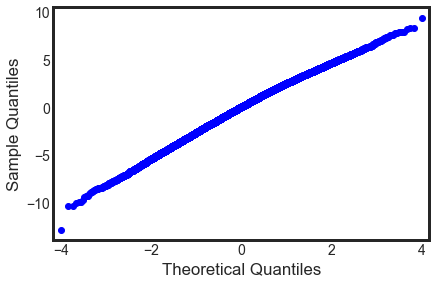

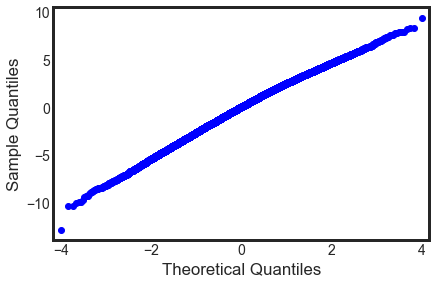

In [78]:
sm.qqplot(CAL_model.resid)

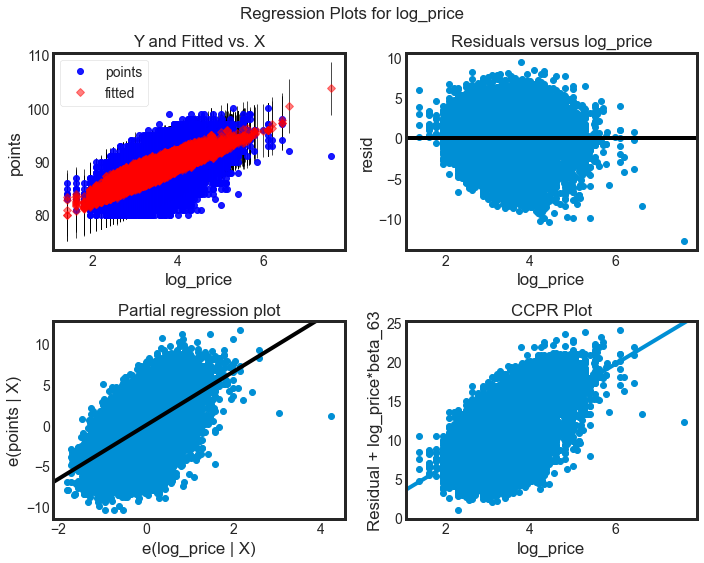

In [79]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(CAL_model, "log_price", fig = fig)

In [80]:
Full_resid = CAL_model.resid
Final_CAL_df['Full_model_res'] = CAL_model.resid

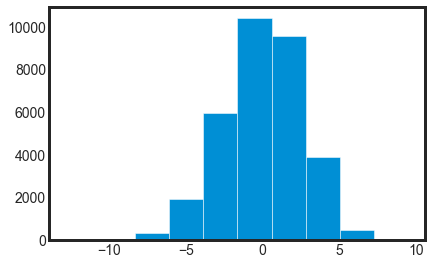

In [81]:
plt.hist(Final_CAL_df.Full_model_res)
plt.show()

In [82]:
Final_CAL_df.Full_model_res.mean()

-1.7252672614310908e-13

In [83]:
Final_CAL_df.Full_model_res.std()

2.549370689552568

# The full model doesn't increase the model's fit very much. The correlation information below shows weak to no correlation whithin the categories to points. The only values that do show a correlation to points  are the unknown tasters and "Other" regions.

In [84]:
ddf=pd.DataFrame(Final_CAL_df)

In [85]:
s=pd.get_dummies(ddf,columns=['region_1'])
s.columns

Index(['country', 'points', 'price', 'province', 'taster_name', 'title',
       'variety', 'winery', 'log_price', 'y_hat_1', 'residuals_1',
       'Full_model_res', 'region_1_Central Coast', 'region_1_Inland Valleys',
       'region_1_North Coast', 'region_1_Other', 'region_1_Sierra Foothills',
       'region_1_Southern CA'],
      dtype='object')

In [86]:
s= s.rename(columns= {'region_1_Central Coast': 'region_1_Central_Coast',
                   'region_1_Inland Valleys':'region_1_Inland_Valleys', 
                   'region_1_North Coast':'region_1_North_Coast', 
                   'region_1_Sierra Foothills':'region_1_Sierra_Foothills', 
                   'region_1_Southern CA':'region_1_Southern_CA'})
s.columns

Index(['country', 'points', 'price', 'province', 'taster_name', 'title',
       'variety', 'winery', 'log_price', 'y_hat_1', 'residuals_1',
       'Full_model_res', 'region_1_Central_Coast', 'region_1_Inland_Valleys',
       'region_1_North_Coast', 'region_1_Other', 'region_1_Sierra_Foothills',
       'region_1_Southern_CA'],
      dtype='object')

In [87]:
df_cm=s.corr(method='pearson')
df_cm

,points,price,log_price,y_hat_1,residuals_1,Full_model_res,region_1_Central_Coast,region_1_Inland_Valleys,region_1_North_Coast,region_1_Other,region_1_Sierra_Foothills,region_1_Southern_CA
points,1.000000,0.447159,5.692614e-01,5.692614e-01,8.221566e-01,7.685795e-01,2.101894e-03,-7.963010e-03,8.700617e-02,-2.127282e-01,-3.376919e-02,2.535742e-02
price,0.447159,1.000000,8.267006e-01,8.267006e-01,-2.852231e-02,-1.227746e-02,-9.384694e-02,-6.670841e-02,1.988494e-01,-1.601038e-01,-8.995849e-02,8.787854e-02
log_price,0.569261,0.826701,1.000000e+00,1.000000e+00,-3.063669e-15,8.168895e-15,-6.312944e-02,-7.306558e-02,2.380596e-01,-3.163281e-01,-1.028757e-01,8.505809e-02
y_hat_1,0.569261,0.826701,1.000000e+00,1.000000e+00,-3.273419e-15,8.296741e-15,-6.312944e-02,-7.306558e-02,2.380596e-01,-3.163281e-01,-1.028757e-01,8.505809e-02
residuals_1,0.822157,-0.028522,-3.063669e-15,-3.273419e-15,1.000000e+00,9.348334e-01,4.626740e-02,4.090511e-02,-5.900577e-02,-3.971842e-02,3.015722e-02,-2.805167e-02
Full_model_res,0.768579,-0.012277,8.168895e-15,8.296741e-15,9.348334e-01,1.000000e+00,-7.328596e-14,3.006203e-14,6.429982e-14,1.572903e-14,-4.202515e-14,-2.305548e-14
region_1_Central_Coast,0.002102,-0.093847,-6.312944e-02,-6.312944e-02,4.626740e-02,-7.328596e-14,1.000000e+00,-2.442275e-01,-6.166344e-01,-1.193724e-01,-1.349556e-01,-9.433625e-02
region_1_Inland_Valleys,-0.007963,-0.066708,-7.306558e-02,-7.306558e-02,4.090511e-02,3.006203e-14,-2.442275e-01,1.000000e+00,-3.727590e-01,-7.216132e-02,-8.158143e-02,-5.702680e-02
region_1_North_Coast,0.087006,0.198849,2.380596e-01,2.380596e-01,-5.900577e-02,6.429982e-14,-6.166344e-01,-3.727590e-01,1.000000e+00,-1.821955e-01,-2.059798e-01,-1.439833e-01
region_1_Other,-0.212728,-0.160104,-3.163281e-01,-3.163281e-01,-3.971842e-02,1.572903e-14,-1.193724e-01,-7.216132e-02,-1.821955e-01,1.000000e+00,-3.987502e-02,-2.787331e-02


In [88]:
s2=pd.get_dummies(ddf,columns=['taster_name'])
s2.columns

Index(['country', 'points', 'price', 'province', 'region_1', 'title',
       'variety', 'winery', 'log_price', 'y_hat_1', 'residuals_1',
       'Full_model_res', 'taster_name_Christina Pickard',
       'taster_name_Jim Gordon', 'taster_name_Joe Czerwinski',
       'taster_name_Matt Kettmann', 'taster_name_Michael Schachner',
       'taster_name_Paul Gregutt', 'taster_name_Roger Voss',
       'taster_name_Unknown', 'taster_name_Virginie Boone'],
      dtype='object')

In [89]:
s2.corr(method='pearson')

,points,price,log_price,y_hat_1,residuals_1,Full_model_res,taster_name_Christina Pickard,taster_name_Jim Gordon,taster_name_Joe Czerwinski,taster_name_Matt Kettmann,taster_name_Michael Schachner,taster_name_Paul Gregutt,taster_name_Roger Voss,taster_name_Unknown,taster_name_Virginie Boone
points,1.000000,0.447159,5.692614e-01,5.692614e-01,8.221566e-01,7.685795e-01,-7.911165e-03,-3.713790e-03,-7.041248e-03,1.983189e-01,-3.725425e-03,-1.780785e-02,2.062486e-03,-2.406023e-01,1.104226e-01
price,0.447159,1.000000,8.267006e-01,8.267006e-01,-2.852231e-02,-1.227746e-02,-5.372228e-03,-1.402893e-01,-8.733268e-03,-5.955121e-03,-4.214229e-03,-3.371386e-02,-4.240577e-03,-3.427450e-02,1.500597e-01
log_price,0.569261,0.826701,1.000000e+00,1.000000e+00,-3.063669e-15,8.168895e-15,-5.783352e-03,-2.041788e-01,-1.135044e-02,4.874530e-02,-4.637285e-03,-4.602602e-02,-4.884980e-03,-6.556884e-02,1.867189e-01
y_hat_1,0.569261,0.826701,1.000000e+00,1.000000e+00,-3.273419e-15,8.296741e-15,-5.783352e-03,-2.041788e-01,-1.135044e-02,4.874530e-02,-4.637285e-03,-4.602602e-02,-4.884980e-03,-6.556884e-02,1.867189e-01
residuals_1,0.822157,-0.028522,-3.063669e-15,-3.273419e-15,1.000000e+00,9.348334e-01,-5.618062e-03,1.368563e-01,-7.053194e-04,2.074667e-01,-1.320427e-03,1.020850e-02,5.890990e-03,-2.472479e-01,5.024339e-03
Full_model_res,0.768579,-0.012277,8.168895e-15,8.296741e-15,9.348334e-01,1.000000e+00,8.169407e-16,2.223479e-14,-3.871319e-15,-2.405247e-14,-1.116382e-15,-3.376285e-15,5.995321e-16,-2.496451e-14,3.352045e-14
taster_name_Christina Pickard,-0.007911,-0.005372,-5.783352e-03,-5.783352e-03,-5.618062e-03,8.169407e-16,1.000000e+00,-3.907949e-03,-2.365361e-04,-4.953863e-03,-1.057628e-04,-6.472993e-04,-8.635364e-05,-1.017950e-02,-6.522545e-03
taster_name_Jim Gordon,-0.003714,-0.140289,-2.041788e-01,-2.041788e-01,1.368563e-01,2.223479e-14,-3.907949e-03,1.000000e+00,-7.568983e-03,-1.585200e-01,-3.384332e-03,-2.071310e-02,-2.763253e-03,-3.257366e-01,-2.087167e-01
taster_name_Joe Czerwinski,-0.007041,-0.008733,-1.135044e-02,-1.135044e-02,-7.053194e-04,-3.871319e-15,-2.365361e-04,-7.568983e-03,1.000000e+00,-9.594726e-03,-2.048432e-04,-1.253700e-03,-1.672512e-04,-1.971583e-02,-1.263298e-02
taster_name_Matt Kettmann,0.198319,-0.005955,4.874530e-02,4.874530e-02,2.074667e-01,-2.405247e-14,-4.953863e-03,-1.585200e-01,-9.594726e-03,1.000000e+00,-4.290106e-03,-2.625671e-02,-3.502803e-03,-4.129159e-01,-2.645771e-01


In [90]:
s3=pd.get_dummies(ddf,columns=['variety'])
s3.columns

Index(['country', 'points', 'price', 'province', 'region_1', 'taster_name',
       'title', 'winery', 'log_price', 'y_hat_1', 'residuals_1',
       'Full_model_res', 'variety_Albariño', 'variety_Barbera',
       'variety_Bordeaux-style Red Blend', 'variety_Cabernet Franc',
       'variety_Cabernet Sauvignon', 'variety_Cabernet Sauvignon-Syrah',
       'variety_Carignane', 'variety_Champagne Blend', 'variety_Chardonnay',
       'variety_Chenin Blanc', 'variety_Fumé Blanc', 'variety_G-S-M',
       'variety_Gewürztraminer', 'variety_Grenache', 'variety_Grenache Blanc',
       'variety_Malbec', 'variety_Marsanne', 'variety_Meritage',
       'variety_Merlot', 'variety_Moscato', 'variety_Mourvèdre',
       'variety_Muscat Canelli', 'variety_Nebbiolo', 'variety_Petit Verdot',
       'variety_Petite Sirah', 'variety_Pinot Blanc', 'variety_Pinot Grigio',
       'variety_Pinot Gris', 'variety_Pinot Noir', 'variety_Port',
       'variety_Primitivo', 'variety_Red Blend',
       'variety_Rhône-styl

In [91]:
s3.corr(method='pearson')


,points,price,log_price,y_hat_1,residuals_1,Full_model_res,variety_Albariño,variety_Barbera,variety_Bordeaux-style Red Blend,variety_Cabernet Franc,...,variety_Shiraz,variety_Sparkling Blend,variety_Syrah,variety_Sémillon,variety_Tannat,variety_Tempranillo,variety_Vermentino,variety_Viognier,variety_White Blend,variety_Zinfandel
points,1.000000,0.447159,5.692614e-01,5.692614e-01,8.221566e-01,7.685795e-01,3.610244e-03,-1.973252e-02,6.074723e-02,-8.439723e-03,...,-2.897648e-02,2.962338e-02,4.249690e-02,-5.875927e-03,1.089601e-03,-1.505308e-02,-3.658006e-03,-2.343824e-02,-3.908064e-02,-7.244136e-02
price,0.447159,1.000000,8.267006e-01,8.267006e-01,-2.852231e-02,-1.227746e-02,-2.664837e-02,-2.643349e-02,1.849043e-01,2.100837e-02,...,-1.287123e-02,-5.971582e-03,-1.162357e-02,-1.290143e-02,4.481953e-04,-1.417279e-02,-1.752892e-02,-4.962277e-02,-5.587442e-02,-9.029497e-02
log_price,0.569261,0.826701,1.000000e+00,1.000000e+00,-3.063669e-15,8.168895e-15,-3.057517e-02,-2.560374e-02,1.697355e-01,3.748080e-02,...,-2.849928e-02,-3.491150e-03,2.158001e-02,-1.491064e-02,3.884411e-03,-8.295030e-03,-2.218835e-02,-5.801612e-02,-8.241584e-02,-9.091610e-02
y_hat_1,0.569261,0.826701,1.000000e+00,1.000000e+00,-3.273419e-15,8.296741e-15,-3.057517e-02,-2.560374e-02,1.697355e-01,3.748080e-02,...,-2.849928e-02,-3.491150e-03,2.158001e-02,-1.491064e-02,3.884411e-03,-8.295030e-03,-2.218835e-02,-5.801612e-02,-8.241584e-02,-9.091610e-02
residuals_1,0.822157,-0.028522,-3.063669e-15,-3.273419e-15,1.000000e+00,9.348334e-01,2.556144e-02,-6.272890e-03,-4.363721e-02,-3.621706e-02,...,-1.551157e-02,3.844859e-02,3.674754e-02,3.177164e-03,-1.364271e-03,-1.256578e-02,1.091393e-02,1.166213e-02,9.530447e-03,-2.516106e-02
Full_model_res,0.768579,-0.012277,8.168895e-15,8.296741e-15,9.348334e-01,1.000000e+00,-2.276523e-15,-5.340481e-15,2.303692e-15,1.410546e-15,...,4.655783e-16,6.188031e-15,-1.409647e-14,-7.988898e-16,3.570896e-16,-3.077567e-15,-7.480946e-16,-5.950286e-15,3.164145e-16,5.462666e-16
variety_Albariño,0.003610,-0.026648,-3.057517e-02,-3.057517e-02,2.556144e-02,-2.276523e-15,1.000000e+00,-3.825286e-03,-8.358374e-03,-5.273525e-03,...,-1.707056e-03,-6.583669e-03,-1.237006e-02,-1.707056e-03,-1.606453e-03,-3.217482e-03,-1.657515e-03,-5.773915e-03,-5.305621e-03,-1.484694e-02
variety_Barbera,-0.019733,-0.026433,-2.560374e-02,-2.560374e-02,-6.272890e-03,-5.340481e-15,-3.825286e-03,1.000000e+00,-1.173595e-02,-7.404529e-03,...,-2.396869e-03,-9.244095e-03,-1.736874e-02,-2.396869e-03,-2.255613e-03,-4.517649e-03,-2.327308e-03,-8.107123e-03,-7.449595e-03,-2.084650e-02
variety_Bordeaux-style Red Blend,0.060747,0.184904,1.697355e-01,1.697355e-01,-4.363721e-02,2.303692e-15,-8.358374e-03,-1.173595e-02,1.000000e+00,-1.617914e-02,...,-5.237237e-03,-2.019865e-02,-3.795127e-02,-5.237237e-03,-4.928588e-03,-9.871211e-03,-5.085245e-03,-1.771433e-02,-1.627761e-02,-4.555029e-02
variety_Cabernet Franc,-0.008440,0.021008,3.748080e-02,3.748080e-02,-3.621706e-02,1.410546e-15,-5.273525e-03,-7.404529e-03,-1.617914e-02,1.000000e+00,...,-3.304315e-03,-1.274388e-02,-2.394448e-02,-3.304315e-03,-3.109580e-03,-6.228015e-03,-3.208419e-03,-1.117645e-02,-1.026999e-02,-2.873892e-02
